In [1]:
import os
import pandas as pd
import nltk
%matplotlib inline

In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
from newsapi import NewsApiClient

In [4]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [6]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q='bitcoin',
                                              language='en',
                                              from_param='2020-03-01',
                                              to='2020-03-15',
                                              sort_by='relevancy')
print(f"Total articles about Bitcoin: {bitcoin_articles['totalResults']}\n")

bitcoin_df = pd.DataFrame.from_dict(bitcoin_articles["articles"])


Total articles about Bitcoin: 1809



In [7]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(q='ethereum',
                                              language='en',
                                              from_param='2020-03-01',
                                              to='2020-03-15',
                                              sort_by='relevancy')
print(f"Total articles about Ethereum: {ethereum_articles['totalResults']}\n")


ethereum_df = pd.DataFrame.from_dict(ethereum_articles["articles"])

Total articles about Ethereum: 425



In [8]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

In [19]:
# Describe the Bitcoin Sentiment
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "compound", "positive", "negative", "neutral", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,compound,positive,negative,neutral,text
0,2020-03-12,-0.2944,0.074,0.078,0.847,Bitcoin is going through a remarkably bad day....
1,2020-03-04,0.0000,0.000,0.000,1.000,After launching two cryptocurrency-oriented sm...
2,2020-03-04,-0.5106,0.103,0.168,0.730,Indias Supreme Court on Wednesday overturned c...
3,2020-03-05,0.4019,0.068,0.000,0.932,The South Korean National Assembly passed new ...
4,2020-03-10,0.5070,0.065,0.000,0.935,Our robot colleague Satoshi Nakaboto writes ab...


In [23]:
bitcoin_df.describe()

,compound,positive,negative,neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.142411,0.068611,0.046056,0.885333
std,0.492077,0.048711,0.054825,0.064806
min,-0.659700,0.000000,0.000000,0.730000
25%,-0.220800,0.056750,0.000000,0.866500
50%,0.222650,0.067500,0.032500,0.887000
75%,0.507000,0.071750,0.071500,0.932000
max,0.834700,0.209000,0.168000,1.000000


In [21]:
# Describe the Ethereum Sentiment
ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "compound", "positive", "negative", "neutral","text", ]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,compound,positive,negative,neutral,text
0,2020-03-12,-0.2944,0.074,0.078,0.847,Bitcoin is going through a remarkably bad day....
1,2020-03-06,0.0000,0.000,0.000,1.000,If a player picks up an item in an online vide...
2,2020-03-05,0.4019,0.068,0.000,0.932,The South Korean National Assembly passed new ...
3,2020-03-12,-0.6597,0.000,0.119,0.881,Reuters\r\nBitcoin tanked Thursday and fell be...
4,2020-03-12,-0.6597,0.000,0.119,0.881,Reuters\r\nBitcoin tanked Thursday and fell be...


In [22]:
# Create the ethereum sentiment scores DataFrame
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.081430,0.058800,0.038850,0.902350
std,0.479252,0.047274,0.052161,0.048531
min,-0.717400,0.000000,0.000000,0.803000
25%,-0.333750,0.000000,0.000000,0.870000
50%,0.272250,0.066500,0.000000,0.909000
75%,0.412225,0.078750,0.080750,0.935500
max,0.802000,0.163000,0.133000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [24]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [27]:
def tokenizer(text):
    """Tokenizes text."""
    # Remove the stop words
    sw = set(stopwords.words('english'))
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
     # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    # Tokenize clean version of words
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    
    return tokens

In [29]:
# Create a new tokens column for bitcoin
bitcoin_tokens = bitcoin_df.copy()
tokenized = []
for i in bitcoin_tokens['text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens':tokenized_articles})

bitcoin_tokens_df= pd.DataFrame(tokenized)
bitcoin_tokens['Tokens'] = bitcoin_tokens_df 


bitcoin_tokens.head()

,date,compound,positive,negative,neutral,text,Tokens
0,2020-03-12,-0.2944,0.074,0.078,0.847,Bitcoin is going through a remarkably bad day....,"[bitcoin, going, remarkably, bad, day, turn, a..."
1,2020-03-04,0.0000,0.000,0.000,1.000,After launching two cryptocurrency-oriented sm...,"[launching, two, cryptocurrencyoriented, smart..."
2,2020-03-04,-0.5106,0.103,0.168,0.730,Indias Supreme Court on Wednesday overturned c...,"[indias, supreme, court, wednesday, overturned..."
3,2020-03-05,0.4019,0.068,0.000,0.932,The South Korean National Assembly passed new ...,"[south, korean, national, assembly, passed, ne..."
4,2020-03-10,0.5070,0.065,0.000,0.935,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [30]:
# Create a new tokens column for ethereum
ether_tokens = ethereum_df.copy()
tokenized = []
for i in ether_tokens['text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens':tokenized_articles})

ether_tokens_df= pd.DataFrame(tokenized)
ether_tokens['Tokens'] = ether_tokens_df 
  
ether_tokens.head()

,date,compound,positive,negative,neutral,text,Tokens
0,2020-03-12,-0.2944,0.074,0.078,0.847,Bitcoin is going through a remarkably bad day....,"[bitcoin, going, remarkably, bad, day, turn, a..."
1,2020-03-06,0.0000,0.000,0.000,1.000,If a player picks up an item in an online vide...,"[player, pick, item, online, video, game, owns..."
2,2020-03-05,0.4019,0.068,0.000,0.932,The South Korean National Assembly passed new ...,"[south, korean, national, assembly, passed, ne..."
3,2020-03-12,-0.6597,0.000,0.119,0.881,Reuters\r\nBitcoin tanked Thursday and fell be...,"[reutersbitcoin, tanked, thursday, fell, first..."
4,2020-03-12,-0.6597,0.000,0.119,0.881,Reuters\r\nBitcoin tanked Thursday and fell be...,"[reutersbitcoin, tanked, thursday, fell, first..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [32]:
from collections import Counter
from nltk import ngrams

In [34]:
# Generate the Bitcoin N-grams where N=2
bitcoin_words = []
for text in bitcoin_tokens['Tokens']:
    for word in text:
        bitcoin_words.append(word)
bitcoin_count = Counter(ngrams(bitcoin_words, n=2), ascending=True)
bitcoin_count.most_common(20)

[(('satoshi', 'nakaboto'), 14),
 (('char', 'robot'), 7),
 (('robot', 'colleague'), 7),
 (('colleague', 'satoshi'), 7),
 (('nakaboto', 'writes'), 7),
 (('writes', 'bitcoin'), 7),
 (('bitcoin', 'btc'), 7),
 (('btc', 'every'), 7),
 (('every', 'fucking'), 7),
 (('fucking', 'daywelcome'), 7),
 (('daywelcome', 'another'), 7),
 (('another', 'edition'), 7),
 (('edition', 'bitcoin'), 7),
 (('bitcoin', 'today'), 7),
 (('today', 'satoshi'), 7),
 (('nakaboto', 'tell'), 7),
 (('tell', 'whats'), 7),
 (('whats', 'going'), 7),
 (('going', 'bitcoin'), 7),
 (('bitcoin', 'past'), 7)]

In [44]:
# Generate the Ethereum N-grams where N=2
ethereum_words = []
for text in ether_tokens['Tokens']:
    for word in text:
        ethereum_words.append(word)
ether_count = Counter(ngrams(ether_words, n=2), ascending=True)
ether_count.most_common(20)

[(('fell', 'first'), 6),
 (('first', 'time'), 6),
 (('char', 'bitcoin'), 5),
 (('char', 'reutersbitcoin'), 4),
 (('reutersbitcoin', 'tanked'), 4),
 (('tanked', 'thursday'), 4),
 (('thursday', 'fell'), 4),
 (('time', 'since'), 4),
 (('since', 'may'), 4),
 (('may', 'amid'), 4),
 (('amid', 'larger'), 4),
 (('larger', 'global'), 4),
 (('global', 'market'), 4),
 (('market', 'selloff'), 4),
 (('selloff', 'investor'), 4),
 (('investor', 'panic'), 4),
 (('panic', 'spread'), 4),
 (('spread', 'coronavirusthe'), 4),
 (('coronavirusthe', 'cryptocurrency'), 4),
 (('cryptocurrency', 'briefly'), 4)]

In [45]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [46]:
# Get the top 10 words for Bitcoin
token_count(bitcoin_words)

[('bitcoin', 25),
 ('char', 18),
 ('satoshi', 14),
 ('nakaboto', 14),
 ('hour', 9),
 ('btc', 9),
 ('today', 9),
 ('going', 8),
 ('robot', 7),
 ('colleague', 7)]

In [47]:
# Get the top 10 words for Ethereum
token_count(ethereum_words)

[('char', 20),
 ('bitcoin', 9),
 ('new', 8),
 ('market', 8),
 ('cryptocurrency', 8),
 ('blockchain', 6),
 ('price', 5),
 ('company', 5),
 ('fell', 5),
 ('cryptocurrencies', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [56]:
def process_text(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    return big_string
bitcoin_word_cloud = process_text(bitcoin_words)
ethereum_word_cloud = process_text(ether_words)

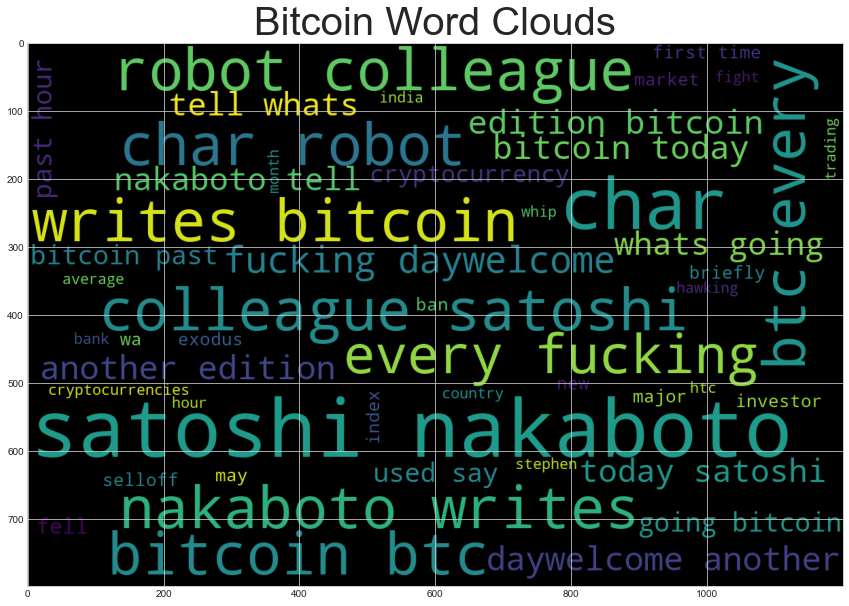

In [51]:
# Generate the Bitcoin word cloud

wc = WordCloud(colormap="RdYlBu").generate(bitcoin_word_cloud)
plt.imshow(wc)
wc = WordCloud(width=1200, height=800, max_words = 50).generate(bitcoin_word_cloud)
plt.title("Bitcoin Word Clouds", fontsize=40)
plt.imshow(wc)

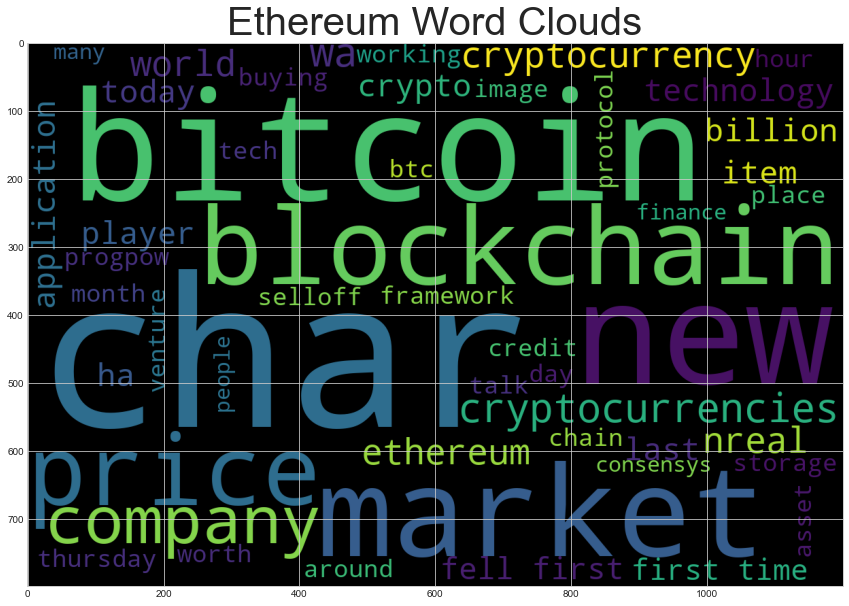

In [57]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ether_word_cloud)
plt.imshow(wc)
wc = WordCloud(width=1200, height=800, max_words = 50).generate(ethereum_word_cloud)
plt.title("Ethereum Word Clouds", fontsize=40)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [53]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [54]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [62]:
# Concatenate all of the bitcoin text together
bitcoin_text = ' '.join(bitcoin_df['text'])
bitcoin_text

'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes.\r\nOn CoinGecko, 1 BTC was worth around $7,250 across … [+1146 chars] After launching two cryptocurrency-oriented smartphones, the HTC Exodus 1 and the Exodus 1s, the company is expanding the lineup with an entirely new device: a 5G router that can function as a full Bitcoin node.\xa0\r\nCalled the HTC Exodus 5G hub, the Android-bas… [+2230 chars] Indias Supreme Court on Wednesday overturned\xa0central banks two-year-old ban on cryptocurrency trading in the country in what many said was a historic verdict.\r\nThe Reserve Bank of India had imposed a ban on cryptocurrency trading in April 2018 that barred ban… [+1336 chars] The South Korean National Assembly passed new legislation today that will provide a framework for the regulation and legalization of cryptocurrencies and crypto e

In [64]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [ ]:
# Render the visualization
displacy.render(doc, style='ent')

In [66]:
# List all Entities
for ent in doc.ents:
    print (ent.text, ent.label_)

Bitcoin GPE
A couple of hours ago TIME
BTC ORG
15% PERCENT
just 20 minutes TIME
CoinGecko PRODUCT
1 CARDINAL
BTC ORG
around $7,250 MONEY
two CARDINAL
HTC Exodus 1 PRODUCT
Exodus WORK_OF_ART
5 CARDINAL
Bitcoin GPE
HTC Exodus 5 PRODUCT
Android-bas GPE
Indias Supreme Court ORG
Wednesday DATE
two-year-old DATE
The Reserve Bank of India ORG
April 2018 DATE
The South Korean National Assembly ORG
today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Hegel PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Rousseau PERSON
Success ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Bentham PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Machiavelli PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
T

---

## Ethereum NER

In [67]:
# Concatenate all of the bitcoin text together
ethereum_text = ' '.join(ethereum_df['text'])
ethereum_text

"Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes.\r\nOn CoinGecko, 1 BTC was worth around $7,250 across … [+1146 chars] If a player picks up an item in an online video game, who owns that item? The player, or the company that made the game?\r\nIn most cases, the answer is probably closer to the latter. The item may be in the players digital inventory – but the company can take i… [+2713 chars] The South Korean National Assembly passed new legislation today that will provide a framework for the regulation and legalization of cryptocurrencies and crypto exchanges.\r\nIn a unanimous vote during a special session of the legislature convened amidst the co… [+2878 chars] Reuters\r\nBitcoin tanked Thursday and fell below $6,000 for the first time since May amid a larger global market sell-off as investors panic about the spread of corona

In [68]:
# Run the NER processor on all of the text
doc = nlp(ethereum_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"


In [69]:
# Render the visualization
displacy.render(doc, style='ent')

In [70]:
# List all Entities
for ent in doc.ents:
    print (ent.text, ent.label_)

Bitcoin GPE
A couple of hours ago TIME
BTC ORG
15% PERCENT
just 20 minutes TIME
CoinGecko PRODUCT
1 CARDINAL
BTC ORG
around $7,250 MONEY
The South Korean National Assembly ORG
today DATE
Reuters
 ORG
Thursday DATE
6,000 MONEY
first ORDINAL
May DATE
as low as $5,705.31 MONEY
Bloomberg ORG
Reuters
 ORG
Thursday DATE
6,000 MONEY
first ORDINAL
May DATE
as low as $5,705.31 MONEY
Bloomberg ORG
7 CARDINAL
7 CARDINAL
one-day DATE
months DATE
Bitcoin GPE
21 percent PERCENT
the last 24 hours TIME
Earlier today TIME
Bitcoin GPE
6,000 MONEY
first ORDINAL
Some Libra Association ORG
Andreessen Horowitz PERSON
today DATE
50 CARDINAL
The Celo Foundation ORG
‘Alliance For Prosperity’ ORG
Intel ORG
Thursday DATE
bitcoin GPE
26% PERCENT
daily DATE
seven years DATE
5,700 MONEY
Fatburger PRODUCT
AFP ORG
Getty Images
 ORG
Joseph Lubin PERSON
Co-Founder ORG
Founder ORG
Consensys ORG
Concordia Summit
 ORG
Blockchain GPE
the last few years DATE
second ORDINAL
Chi Xu PERSON
NrealClay NORP
LightNreal Light 5 PRO